# waves

In [263]:
#import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import pandas as pd
from IPython.display import display

**main variables**
<br> f - main frequency (Hz)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.

In [264]:
f=2
#t=4
samples=4000
s_rate=1000
t=samples/s_rate
randamp=2
nyquist=samples/2/t
frangemax=int(70*t)
frangemaxind=int(35*t)

x = np.linspace(0.0, t, samples)
#s_det = np.sin(f*2*np.pi*x)
s_det = np.sin(f*2*np.pi*x*(1+(x*10**2)**0.5)) #Changing freqency
s_noise = (np.random.rand(samples)-0.5)*randamp
s=(s_det+s_noise)/(0.5*randamp+1)

#f1=f; f2=f/np.sqrt(2); s=np.sin(f1*2*np.pi*x)+np.sin(f2*2*np.pi*x)

The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - 1 range. The zooming is exponential. Value 0 displays the whole range.

In [265]:
usewidgets=1
import ipywidgets as widgets
view=widgets.FloatSlider()
if usewidgets==1:
    display(view)
else:
    view.value=0

FloatSlider(value=0.0)

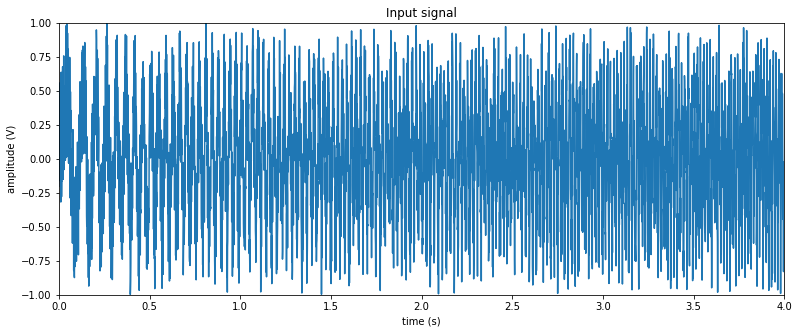

In [266]:
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
yaxismax=1/2**(view.value/12)
plt.axis([0,t/(1.05**view.value),-1,1])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

yf = scipy.fftpack.fft(s)
xf = np.linspace(0.0, frangemax/t, frangemax+1)


## Fourier transform and examining it
<br>Now we take the Fourier-transform of the signal abowe, what has been already calculated, and make 3 plots:
 - One displaying the Real and imaginery parts of the vectors generated by Fourier at the corresponding frequencies
 - Next displaying their absolute values - we wil use these absolute values in the future
 - And one displaying the rotation of these vectors on the imaginary plane

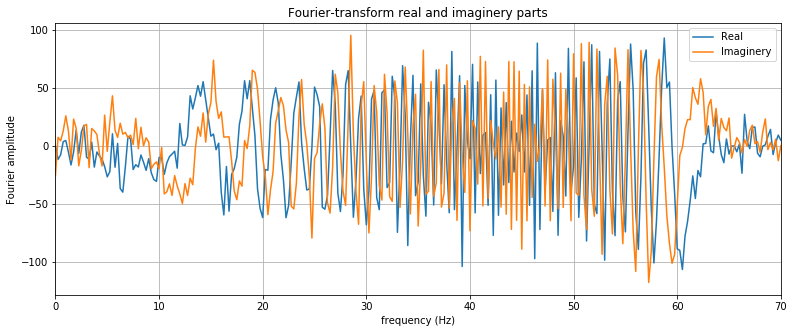

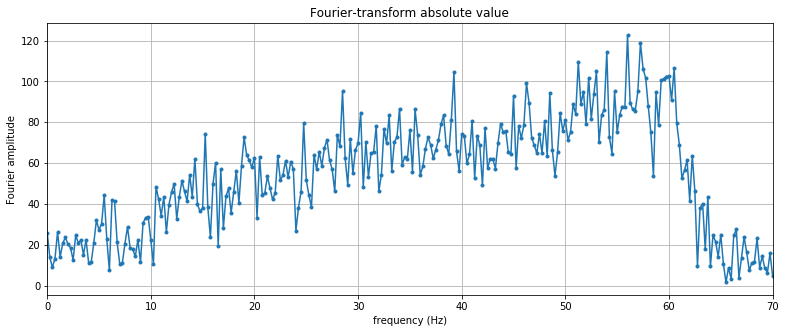

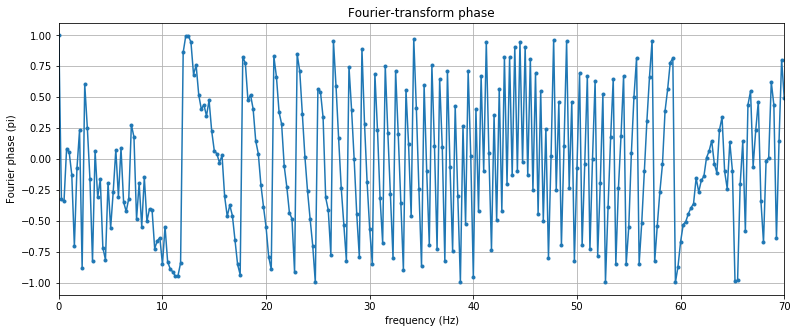

-0.8834732678370799
0.2321895621677532
-0.07491664249087025


In [267]:
yfabs=np.abs(yf[:frangemax+1])
yfang=np.angle(yf[:frangemax+1])
yfimag=np.imag(yf[:frangemax+1])
yfreal=np.real(yf[:frangemax+1])
#yfabs=(np.abs(yf[:frangemax])*np.abs(yfimag)*np.abs(yfreal))

plt.figure(figsize=(13,5))
plt.plot(xf,yfimag,xf,yfreal)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier amplitude')
#plt.xscale('log')
plt.title('Fourier-transform real and imaginery parts')
plt.grid(True)
plt.legend(('Real', 'Imaginery'))
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yfabs,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier amplitude')
#plt.xscale('log')
plt.title('Fourier-transform absolute value')
plt.grid(True)
plt.show()

yfang=yfang/np.pi
plt.figure(figsize=(13,5))
plt.plot(xf,yfang,".-")
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)') 
plt.ylabel("Fourier phase (pi)")
#plt.xscale('log')
plt.title('Fourier-transform phase')
plt.grid(True)
plt.show()

print(yfang[f*int(t)+1])
print(yfang[f*int(t)])
print(yfang[f*int(t)-1])

Now, we will seek the peaks of the 2nd graph: we will search for the most likely original frequencies. We will find the 5 biggest values, and display their Fourier (absolute) values.

In [268]:
#print (np.average(np.abs(yf)))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    yfmaxsum=yfmaxsum+yfsort[frangemax-i]
    for j in range(frangemax):
        if yfsort[frangemax-i] == yfabs[j]:
            fout[i]=j/t
    #print (fout[i],"  ",yfabs[fout[i]])
#print (np.max(np.abs(yf)))

d = {'Frequency (Hz)': [fout[0],fout[1],fout[2],fout[3],fout[4]], 
     'Fourier amplitude': [yfabs[int(fout[0]*t)],yfabs[int(fout[1]*t)],yfabs[int(fout[2]*t)],yfabs[int(fout[3]*t)],yfabs[int(fout[4]*t)]]}
df = pd.DataFrame(data=d)
display (df)

deviation=np.std(yfabs)
certainity=yfabs[int(fout[0]*t)]/deviation

yfsum=np.sum(yfabs*yfabs)
certainity2=yfabs[int(fout[0]*t)]*yfabs[int(fout[0]*t)]/yfsum


if fout[0]==f:
    print ('We have succesfully found our original frequency:', f ,'Hz')
#    print ('\nConfidence using square sum:', 100*certainity2, '%')
#    print ('Confidence using standard deviation:', certainity)
else:
    print ("We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.")

,Frequency (Hz),Fourier amplitude
0,56.00,122.584245
1,57.25,118.954405
2,54.00,114.513704
3,51.25,109.458527
4,60.50,106.723956


We haven't succesfully found our original frequency. It has drowned in noise, or the program is not good enough to detect it.


Now, we will F-transform the deterministic and stohastic component of our signal separatly, and compare them.

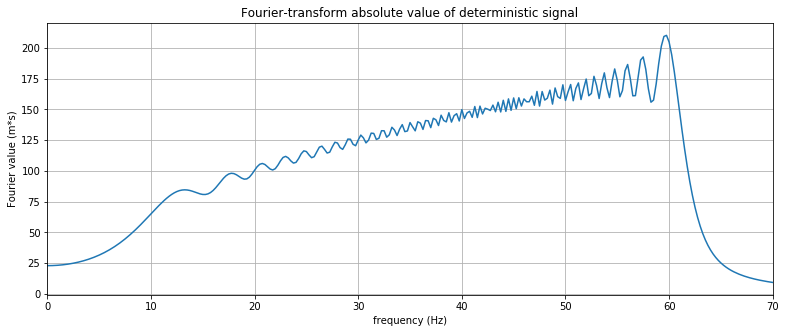

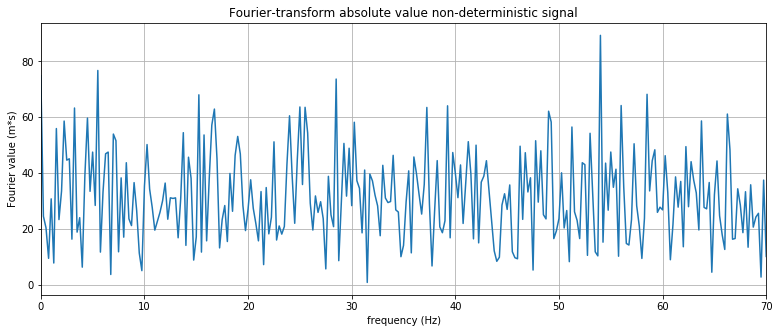

In [269]:
yf_det=scipy.fftpack.fft(s_det)
yf_det_abs=np.abs(yf_det[:frangemax+1])
yf_noise=scipy.fftpack.fft(s_noise)
yf_noise_abs=np.abs(yf_noise[:frangemax+1])

plt.figure(figsize=(13,5))
plt.plot(xf,yf_det_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
#plt.xscale('log')
plt.title('Fourier-transform absolute value of deterministic signal')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.plot(xf,yf_noise_abs)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value (m*s)')
plt.title('Fourier-transform absolute value non-deterministic signal')
plt.grid(True)
plt.show()

Now we create and apply a window and a short, continous windowed fourier-transform.

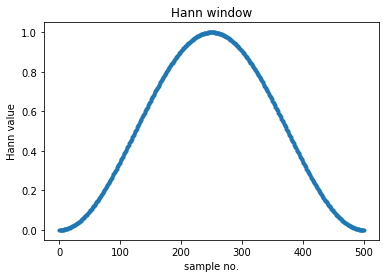

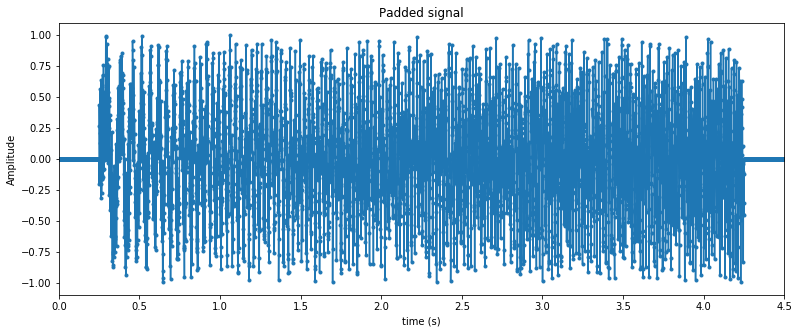

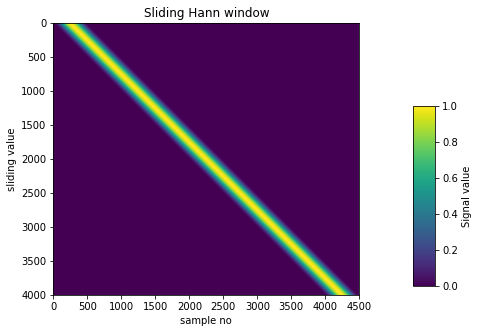

In [270]:
hann_r = 250
hann_base = np.hanning(2*hann_r+1)

plt.plot(hann_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
plt.show()

z_padded_s = np.linspace (0, 0, samples+2*hann_r)
z_0=z_padded_s
z_padded_s[hann_r:-hann_r] = s
t_padded_s=t+(2*hann_r/s_rate)

plt.figure(figsize=(13,5))
plt.plot(np.linspace(0.0, t_padded_s, samples+2*hann_r),z_padded_s,".-")
plt.xlim((0,t_padded_s))
plt.title('Padded signal')
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.show()

win = np.zeros((samples, samples+hann_r+hann_r))
for i in range(samples):
    win [i][i:i+hann_r+hann_r+1]=hann_base

plt.figure(figsize=(10,5))
plt.imshow(win)
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

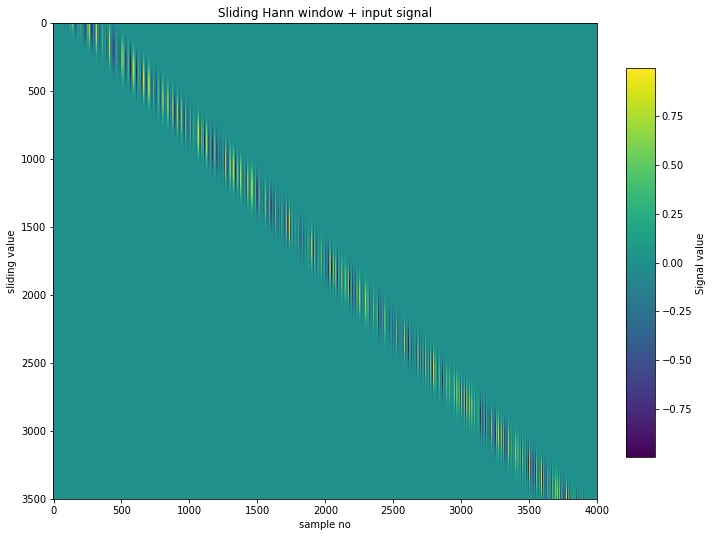

In [271]:
z_win = np.zeros((samples-hann_r-hann_r, samples))
for i in range(samples-hann_r-hann_r):
    z_win[i] = win[i][:-hann_r-hann_r] * z_padded_s[hann_r:-hann_r]

plt.figure(figsize=(10,10))
plt.imshow(z_win)
plt.title('Sliding Hann window + input signal')
plt.xlabel('sample no')
plt.ylabel('sliding value')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.92, 0.23, 0.04, 0.54])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

In [272]:
z_win_fft = np.zeros((samples-hann_r-hann_r, samples))
for i in range(samples-hann_r-hann_r):
    z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i])) 

z_win_fft_cutted = np.zeros((frangemax, samples-hann_r-hann_r))
for i in range(samples-hann_r-hann_r):
    for j in range(frangemax):
        z_win_fft_cutted [-j][i] = z_win_fft [i][j]

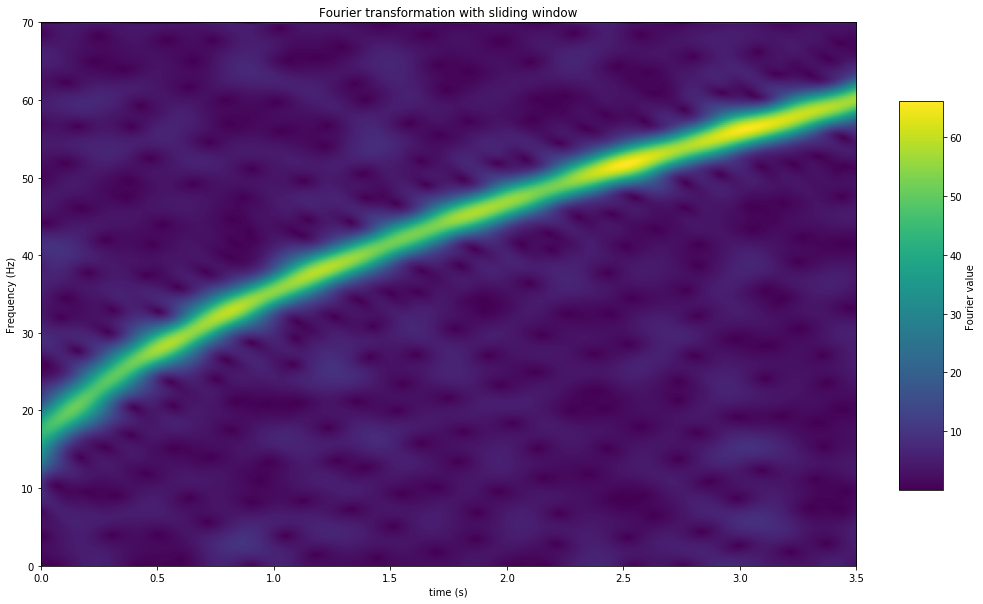

In [273]:
plt.figure(figsize=(15,10))
plt.imshow(z_win_fft_cutted,interpolation='hanning',extent=[0,t-(2*hann_r/s_rate),0,frangemax/t], aspect='auto')
plt.title('Fourier transformation with sliding window')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time (s)')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.92, 0.23, 0.04, 0.54])
plt.colorbar(cax=cax).set_label('Fourier value')
plt.show()

Now, we make a histogram.

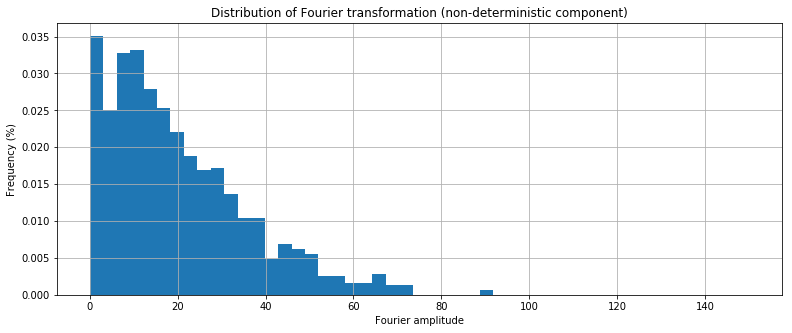

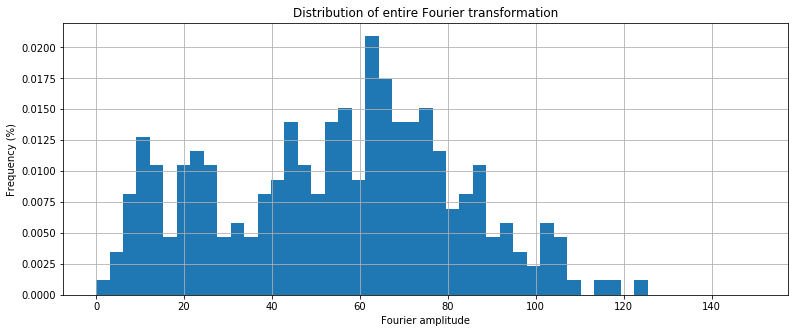

In [274]:
hist_bins = np.linspace(0.0, 150, 50)

plt.figure(figsize=(13,5))
plt.hist(yf_noise,hist_bins, density=True)
plt.title('Distribution of Fourier transformation (non-deterministic component)')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(13,5))
plt.hist(yfabs, hist_bins, density=True)
plt.title('Distribution of entire Fourier transformation')
plt.ylabel('Frequency (%)')
plt.xlabel('Fourier amplitude')
plt.grid(True)
plt.show()

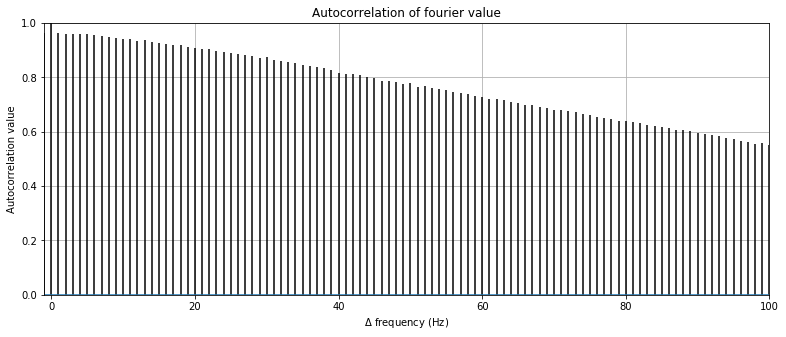

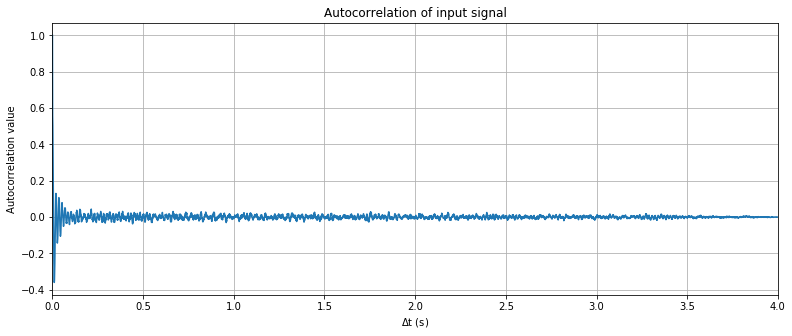

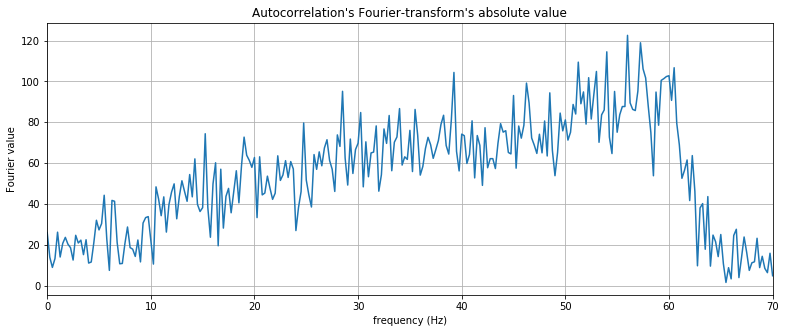

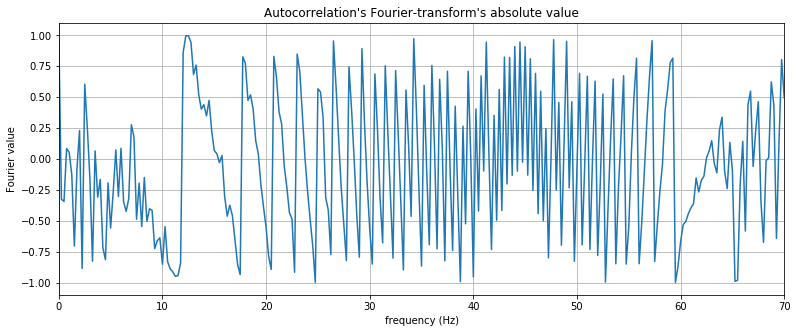

In [275]:
plt.figure(figsize=(13,5))
plt.acorr(yfabs, maxlags=100)
plt.axis([-1,100,0,1])
#plt.xlim((0,frangemax))
plt.xlabel('$\Delta$ frequency (Hz)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of fourier value')
plt.grid(True)
plt.show()

def acf(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

s_acf=acf(s)
s_acf=s_acf/np.max(s_acf)
s_acf_fft_abs=abs(scipy.fftpack.fft(s))
s_acf_fft_ang=np.angle(scipy.fftpack.fft(s))/np.pi

plt.figure(figsize=(13,5))
plt.plot(x,s_acf)
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,t))
plt.xlabel('$\Delta$t (s)')
plt.ylabel('Autocorrelation value')
#plt.xscale('log')
plt.title('Autocorrelation of input signal')
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(np.linspace(0.0, frangemax/t, frangemax+1),s_acf_fft_abs[:frangemax+1])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's absolute value")
plt.grid(True)
#plt.show()

plt.figure(figsize=(13,5))
plt.plot(np.linspace(0.0, frangemax/t, frangemax+1),s_acf_fft_ang[:frangemax+1])
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax/t))
plt.xlabel('frequency (Hz)')
plt.ylabel('Fourier value')
#plt.xscale('log')
plt.title("Autocorrelation's Fourier-transform's absolute value")
plt.grid(True)
#plt.show()

We can see, that the ratio of the values of the Fourier transform of the deterministic and non-deterministic components of the input signal is practically a constant, and it is influenced by the relative amplitude of these components in the original signal. Is this a coincidence? [drawing](https://i.redd.it/nnlrafulz5701.jpg)

In [276]:
det_noise_fft_ratios = yfabs/np.abs(yf_noise[:frangemax+1]+yf_det[:frangemax+1])
print("Ratio of the ffts of deterministic and non-deterministic components:",'\naverage:',np.average(det_noise_fft_ratios))
print('Standard deviation:',np.std(det_noise_fft_ratios))
if np.std(det_noise_fft_ratios)<0.001 :
    print("The deviation is practically zero.")

Ratio of the ffts of deterministic and non-deterministic components: 
average: 0.5
Standard deviation: 2.336674059759706e-16
The deviation is practically zero.


## Tasks
<br> Fourier amplitude and phase titles
<br> Time and frequency indexes (/t)
<br> Determine wich fft (scipy, numpy) is better and use that, compare scipy stft with own
<br> Changing amplitude
<br> Frequency - time function at the beginning
<br> "Now we make a histogram"
<br> Nyquist freq as frangemax
<br> frangemax != frangemaxind (use an int for indexing!)
<br> Lookup pandas